In [91]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
df_nf016 = pd.read_csv("./data/redflags_analysis/nf016.csv")
df_nf017 = pd.read_csv("./data/redflags_analysis/nf017.csv").iloc[:, [1,2,4]]
df_nf019 = pd.read_csv("./data/redflags_analysis/nf019.csv")

df_nf016.columns = ["ruc", "ocid", "NF016"]
df_nf017.columns = ["ocid", "ruc", "NF017"]
df_nf019.columns = ["ocid", "ruc", "NF019"]

In [93]:
df_nf016

,ruc,ocid,NF016
0,EC-RUC-1768159220001-338536,ocds-5wno2w-LICO-SECOB-002-2019-338536,1
1,EC-RUC-0960000490001-44718,ocds-5wno2w-LICO-GADIMCD-01-2021-44718,1
2,EC-RUC-1768159220001-338536,ocds-5wno2w-LICO-SECOB-003-2019-338536,1
3,EC-RUC-0760000770001-39712,ocds-5wno2w-RE-ESPE-017-2021-30573,1
4,EC-RUC-0360000310001-99459,ocds-5wno2w-RSIE-GADPRGÜEL-005-118007,1
...,...,...,...
3451,EC-RUC-0968599020001-462114,ocds-5wno2w-COTO-CNELMLG-010-20-462114,1
3452,EC-RUC-0968599020001-462114,ocds-5wno2w-COTO-CNELMLG-013-20-462114,1
3453,EC-RUC-0968599020001-462114,ocds-5wno2w-COTO-CNELMLG-014-20-462114,1
3454,EC-RUC-0968599020001-462114,ocds-5wno2w-COTO-CNELPRI-003-19-462114,1


In [94]:
df_nf017

,ocid,ruc,NF017
0,ocds-5wno2w-MCO-GADPEO-Q-09-2018-17250,EC-RUC-0705215606001-585014,1
1,ocds-5wno2w-MCO-GADPO-111COP-18-29112,EC-RUC-1310092018001-37975,1
2,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1
3,ocds-5wno2w-MCO-GADPRB-01-2019-110239,EC-RUC-0291518028001-879978,1
4,ocds-5wno2w-MCO-GADPO-001-2019-125195,EC-RUC-1103801864001-785041,1
...,...,...,...
468367,ocds-5wno2w-SIE-DDSPHTS-014-2022-101386,EC-RUC-1003020680001-886715,1
468368,ocds-5wno2w-REPUF-ISSFA-016-2022-2803,EC-RUC-0990018707001-4660,0
468369,ocds-5wno2w-SIE-HEJCA-F-300-2022-87497,EC-RUC-0990018707001-4660,0
468370,ocds-5wno2w-SIE-HEJCA-F-284-2022-87497,EC-RUC-1790233332001-41388,1


In [95]:
df_nf019

,ocid,ruc,NF019
0,ocds-5wno2w-SIE-GPA-001-2019-30745,EC-RUC-1791773268001-239301,1
1,ocds-5wno2w-SIE-GPA-004-2019-30745,EC-RUC-0190061884001-15260,0
2,ocds-5wno2w-SIE-GPA-009-2019-30745,EC-RUC-0103903399001-282302,1
3,ocds-5wno2w-SIE-GPA-011-2019-30745,EC-RUC-0101364107001-30471,1
4,ocds-5wno2w-SIE-GPA-012-2019-30745,EC-RUC-0102788635001-471993,1
...,...,...,...
36570,ocds-5wno2w-GADPRBM-001-SIE-2022-98091,EC-RUC-1804030516001-320197,0
36571,ocds-5wno2w-IESS-CSA-PIL003-2022-84345,EC-RUC-0291518281001-911245,0
36572,ocds-5wno2w-SIE-GADPRT-2022-003-141875,EC-RUC-2290350223001-1055231,0
36573,ocds-5wno2w-SIE-CCSL-002-2022-596563,EC-RUC-1590017414001-550710,0


In [96]:
df_nf017 = df_nf017.loc[0:36574]

In [97]:
df_nf017

,ocid,ruc,NF017
0,ocds-5wno2w-MCO-GADPEO-Q-09-2018-17250,EC-RUC-0705215606001-585014,1
1,ocds-5wno2w-MCO-GADPO-111COP-18-29112,EC-RUC-1310092018001-37975,1
2,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1
3,ocds-5wno2w-MCO-GADPRB-01-2019-110239,EC-RUC-0291518028001-879978,1
4,ocds-5wno2w-MCO-GADPO-001-2019-125195,EC-RUC-1103801864001-785041,1
...,...,...,...
36570,ocds-5wno2w-LICO-GADMM-09-2021-28990,EC-RUC-0992418664001-60783,1
36571,ocds-5wno2w-LICO-GADMM-09-2021-28990,EC-RUC-0992418664001-60783,1
36572,ocds-5wno2w-LICO-GADMM-OP-06-021-28990,EC-RUC-0790093844001-21880,1
36573,ocds-5wno2w-LICO-GADMM-OP-06-021-28990,EC-RUC-0790093844001-21880,1


In [98]:
df = df_nf017.merge(df_nf019, on=["ocid", "ruc"], how="outer")

In [99]:
df

,ocid,ruc,NF017,NF019
0,ocds-5wno2w-MCO-GADPEO-Q-09-2018-17250,EC-RUC-0705215606001-585014,1.0,NaN
1,ocds-5wno2w-MCO-GADPO-111COP-18-29112,EC-RUC-1310092018001-37975,1.0,NaN
2,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0
3,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0
4,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0
...,...,...,...,...
66801,ocds-5wno2w-SIE-CBR-006-2022-1073475,EC-RUC-1790749274001-34420,NaN,1.0
66802,ocds-5wno2w-GADPRBM-001-SIE-2022-98091,EC-RUC-1804030516001-320197,NaN,0.0
66803,ocds-5wno2w-SIE-GADPRT-2022-003-141875,EC-RUC-2290350223001-1055231,NaN,0.0
66804,ocds-5wno2w-SIE-CCSL-002-2022-596563,EC-RUC-1590017414001-550710,NaN,0.0


In [100]:
df = df.merge(df_nf016, on=["ocid", "ruc"], how="outer")
df

,ocid,ruc,NF017,NF019,NF016
0,ocds-5wno2w-MCO-GADPEO-Q-09-2018-17250,EC-RUC-0705215606001-585014,1.0,NaN,NaN
1,ocds-5wno2w-MCO-GADPO-111COP-18-29112,EC-RUC-1310092018001-37975,1.0,NaN,NaN
2,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0,NaN
3,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0,NaN
4,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1.0,0.0,NaN
...,...,...,...,...,...
70257,ocds-5wno2w-COTO-CNELMLG-010-20-462114,EC-RUC-0968599020001-462114,NaN,NaN,1.0
70258,ocds-5wno2w-COTO-CNELMLG-013-20-462114,EC-RUC-0968599020001-462114,NaN,NaN,1.0
70259,ocds-5wno2w-COTO-CNELMLG-014-20-462114,EC-RUC-0968599020001-462114,NaN,NaN,1.0
70260,ocds-5wno2w-COTO-CNELPRI-003-19-462114,EC-RUC-0968599020001-462114,NaN,NaN,1.0


In [101]:
df.fillna(0, inplace=True)

df.loc[:, "NF019"] = df.loc[:, "NF019"].astype("int64")
df.loc[:, "NF016"] = df.loc[:, "NF016"].astype("int64")
df.loc[:, "NF017"] = df.loc[:, "NF017"].astype("int64")

df = df[df["ruc"]!=0]
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_18476\563149597.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "NF019"] = df.loc[:, "NF019"].astype("int64")
C:\Users\DELL\AppData\Local\Temp\ipykernel_18476\563149597.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "NF016"] = df.loc[:, "NF016"].astype("int64")
C:\Users\DELL\AppData\Local\Temp\ipykernel_18476\563149597.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old

,ocid,ruc,NF017,NF019,NF016
0,ocds-5wno2w-MCO-GADPEO-Q-09-2018-17250,EC-RUC-0705215606001-585014,1,0,0
1,ocds-5wno2w-MCO-GADPO-111COP-18-29112,EC-RUC-1310092018001-37975,1,0,0
2,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1,0,0
3,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1,0,0
4,ocds-5wno2w-LICO-GADMCH-001-2019-43412,EC-RUC-1391844786001-784910,1,0,0
...,...,...,...,...,...
70257,ocds-5wno2w-COTO-CNELMLG-010-20-462114,EC-RUC-0968599020001-462114,0,0,1
70258,ocds-5wno2w-COTO-CNELMLG-013-20-462114,EC-RUC-0968599020001-462114,0,0,1
70259,ocds-5wno2w-COTO-CNELMLG-014-20-462114,EC-RUC-0968599020001-462114,0,0,1
70260,ocds-5wno2w-COTO-CNELPRI-003-19-462114,EC-RUC-0968599020001-462114,0,0,1


In [102]:
df[df["ruc"]==0]

,ocid,ruc,NF017,NF019,NF016


In [103]:
df.dtypes

ocid     object
ruc      object
NF017     int64
NF019     int64
NF016     int64
dtype: object

In [104]:
df_clustering = df.groupby("ruc")["NF017", "NF019", "NF016"].sum()
df_clustering

C:\Users\DELL\AppData\Local\Temp\ipykernel_18476\881754911.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_clustering = df.groupby("ruc")["NF017", "NF019", "NF016"].sum()


,NF017,NF019,NF016
ruc,,,
EC-RUC-0100109164001-267709,1,0,0
EC-RUC-0100334853001-505174,1,0,0
EC-RUC-0100412402001-1019036,0,1,0
EC-RUC-0100643014001-47366,42,0,0
EC-RUC-0100692649001-50672,0,1,0
...,...,...,...
ID-2100403993001-856304,1,0,0
ID-2100974753001-850663,0,1,0
ID-A41050113-543631,0,1,0


### Aqui tenemos los ruc de las empresas participantes en proceso de licitación con la cantidad de veces que se vieron envueltas en las redflags NF016, NF017 y NF019

In [105]:
df_clustering = df_clustering.reset_index()

In [106]:
df_clustering

,ruc,NF017,NF019,NF016
0,EC-RUC-0100109164001-267709,1,0,0
1,EC-RUC-0100334853001-505174,1,0,0
2,EC-RUC-0100412402001-1019036,0,1,0
3,EC-RUC-0100643014001-47366,42,0,0
4,EC-RUC-0100692649001-50672,0,1,0
...,...,...,...,...
13909,ID-2100403993001-856304,1,0,0
13910,ID-2100974753001-850663,0,1,0
13911,ID-A41050113-543631,0,1,0
13912,ID-B85173136-991809,0,0,0


In [107]:
X = df_clustering.iloc[:,1:]

In [108]:
vector = np.arange(1,11)

In [109]:
vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [110]:
inercias = []
for k in vector:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

In [111]:
inercias

[5019521.028963674,
 3097127.0413974463,
 1886419.864286966,
 1406513.3596869777,
 1099386.3773233292,
 910141.5006727388,
 749481.3687967674,
 638556.8086517091,
 568936.8074644348,
 484711.96312366327]

In [112]:
dfg = pd.DataFrame({"k":vector,"inercia":inercias})
dfg.head()

,k,inercia
0,1,5.019521e+06
1,2,3.097127e+06
2,3,1.886420e+06
3,4,1.406513e+06
4,5,1.099386e+06


<AxesSubplot: xlabel='k', ylabel='inercia'>

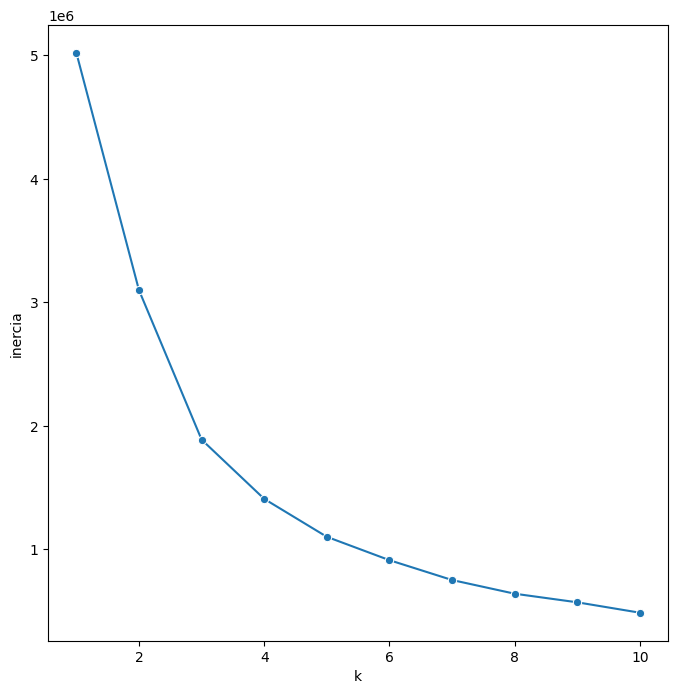

In [113]:
fig,ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=dfg,x="k",marker="o",y="inercia",ax=ax)

In [131]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [132]:
kmeans.n_iter_

8

In [133]:
kmeans.cluster_centers_

array([[ 1.51699257e+00,  1.60538278e+00,  2.49368641e-01],
       [ 1.71254545e+02,  8.08545455e+01, -5.55111512e-17]])

In [134]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [135]:
df_clustering["cluster"] = kmeans.labels_

In [136]:
df_clustering

,ruc,NF017,NF019,NF016,cluster
0,EC-RUC-0100109164001-267709,1,0,0,0
1,EC-RUC-0100334853001-505174,1,0,0,0
2,EC-RUC-0100412402001-1019036,0,1,0,0
3,EC-RUC-0100643014001-47366,42,0,0,0
4,EC-RUC-0100692649001-50672,0,1,0,0
...,...,...,...,...,...
13909,ID-2100403993001-856304,1,0,0,0
13910,ID-2100974753001-850663,0,1,0,0
13911,ID-A41050113-543631,0,1,0,0
13912,ID-B85173136-991809,0,0,0,0


In [139]:
df_clustering[df_clustering['NF016'] != 0]

,ruc,NF017,NF019,NF016,cluster
612,EC-RUC-0160000190001-30745,0,0,13,0
613,EC-RUC-0160000270001-2616,0,0,17,0
614,EC-RUC-0160000350001-89973,0,0,1,0
615,EC-RUC-0160000430001-12403,0,0,5,0
616,EC-RUC-0160000510001-8098,0,0,6,0
...,...,...,...,...,...
13702,EC-RUC-2360004350001-432323,0,0,1,0
13704,EC-RUC-2360005400001-479584,0,0,1,0
13705,EC-RUC-2360007880001-982966,0,0,2,0
13765,EC-RUC-2460001580001-369788,0,0,1,0


In [140]:
df_clustering[df_clustering['cluster'] == 0]

,ruc,NF017,NF019,NF016,cluster
0,EC-RUC-0100109164001-267709,1,0,0,0
1,EC-RUC-0100334853001-505174,1,0,0,0
2,EC-RUC-0100412402001-1019036,0,1,0,0
3,EC-RUC-0100643014001-47366,42,0,0,0
4,EC-RUC-0100692649001-50672,0,1,0,0
...,...,...,...,...,...
13909,ID-2100403993001-856304,1,0,0,0
13910,ID-2100974753001-850663,0,1,0,0
13911,ID-A41050113-543631,0,1,0,0
13912,ID-B85173136-991809,0,0,0,0


In [138]:
df_clustering[df_clustering['cluster'] == 1]

,ruc,NF017,NF019,NF016,cluster
462,EC-RUC-0104416755001-823540,151,0,0,1
675,EC-RUC-0190123626001-40900,0,420,0,1
678,EC-RUC-0190146677001-11735,100,89,0,1
744,EC-RUC-0190340325001-197339,124,40,0,1
1165,EC-RUC-0301407045001-49868,247,0,0,1
1959,EC-RUC-0602921157001-948262,90,135,0,1
1982,EC-RUC-0603004524001-204400,247,0,0,1
2394,EC-RUC-0701609299001-64308,112,0,0,1
2577,EC-RUC-0703547299001-1085546,223,0,0,1
4110,EC-RUC-0922490834001-603318,159,108,0,1


## en el entrenamiento tenemos dos grupos, lo cual podemos definir como grupo de empresas envueltas en corrucion en los procesos de contratacion publica (1) , y empresas que han entrado en alguna categoria de una de las tres redflags pero que no se consideran corruptas

<AxesSubplot: xlabel='cluster', ylabel='NF017'>

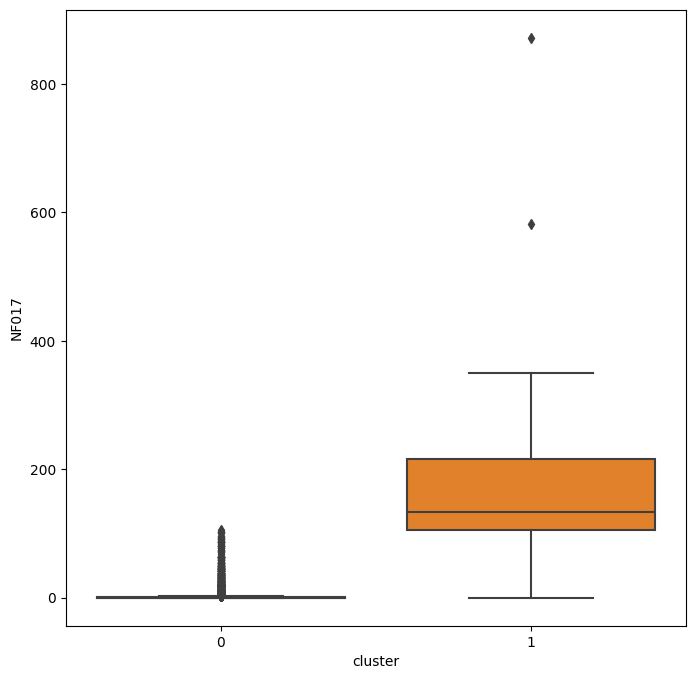

In [142]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=df_clustering, x="cluster", y="NF017")

### para la redflag NF017 (Que hace referencia a aquellas empresas y/o procesos de contratacion donde hubo aalteraciones en los precion de los servicios) vemos que gran parte de las enpresas pertece al grupo cero, estas tienen entre cero a 150 aproximadamente incidencias en este tipo de casos, es decir que se hanvisto envueltas entre cero y 200 veces en este tipo de redflag , y vemos que las del grupo 1 estan entre 0 a 400 incidencias en este tipo de redflag, es decir estas son las que mas veces se han visto envueltas en este tipo de casos de alteracion de los precios de los servicios en los procesos de contratacion

<AxesSubplot: xlabel='cluster', ylabel='NF016'>

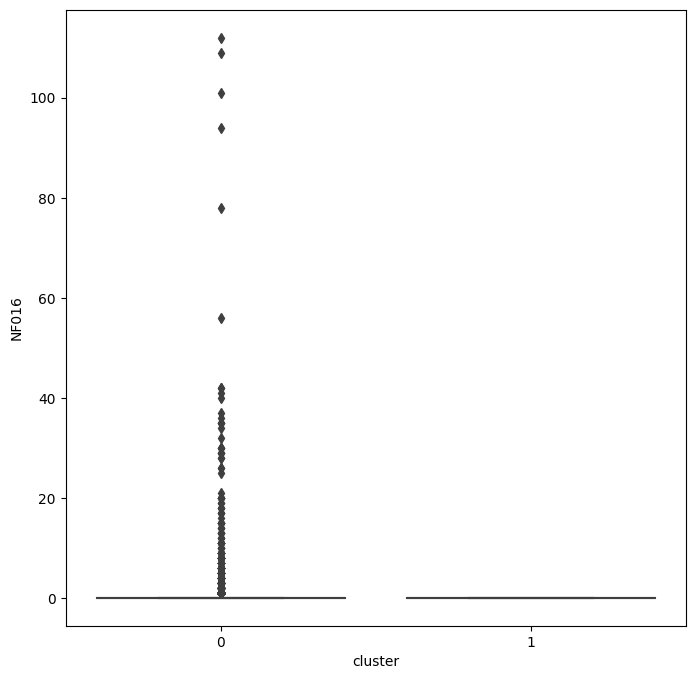

In [143]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=df_clustering, x="cluster", y="NF016")

### aqui apreciamos que todas las observaciones estan en el grupo cero de clustering, es decir que la redflag NF016 para este modelo en particular no es significativa o no tiene un peso para determinar si pertenece al grupo 1, vemos ademas que la gran mayoria tiene valores por debajo de 100 incidencias es decir que la mayoria de las empresas que cumplen con esta redflag  han tenido incidencias en este tipo de casos en su gran mayoria menores a 100 veces

<AxesSubplot: xlabel='cluster', ylabel='NF019'>

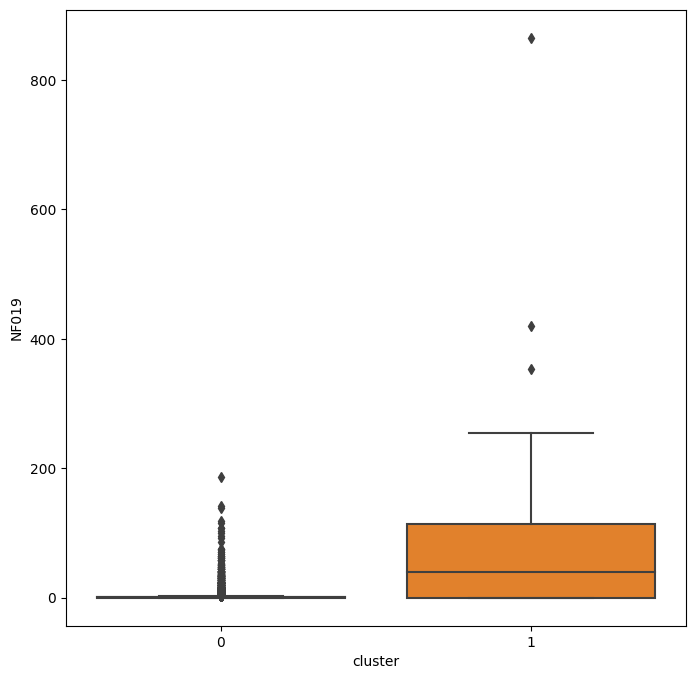

In [145]:

fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=df_clustering, x="cluster", y="NF019")

### esta redflag indica que tan competitivo fue un proceso de contratacion es decir evalua si la cantidad de oferentes que deberia a ver en un proceso de contratacion esta por debajo de la media, en este caso se evalua que empresas que resultaron ganadores del proceso de licitacion se vieron envueltas en casos de cprocesos poco competitivos, pues esto podria se un indicativo de que el proceso fue comprado con anteriordiad, en esta grafica vemos que para el grupo cero la mayoria de empresas tiene inicidencias en este tipo de proceso por debajo de las 200 veces es mas podemos observar como se apilan llegando al cero , por lo que se infiere que la mayor catidad de las empresas esta por debajo de la 150 veces en las que se vieron envueltas en procesos pocos competitivos
### Luego tenemos el grupo 1 donde vemos que el numero de incidencias es mayor a las 200 veces , por lo que se puede decir que aqui estan las que mas veces han sido participes de procesos de contratacion poco competitivos

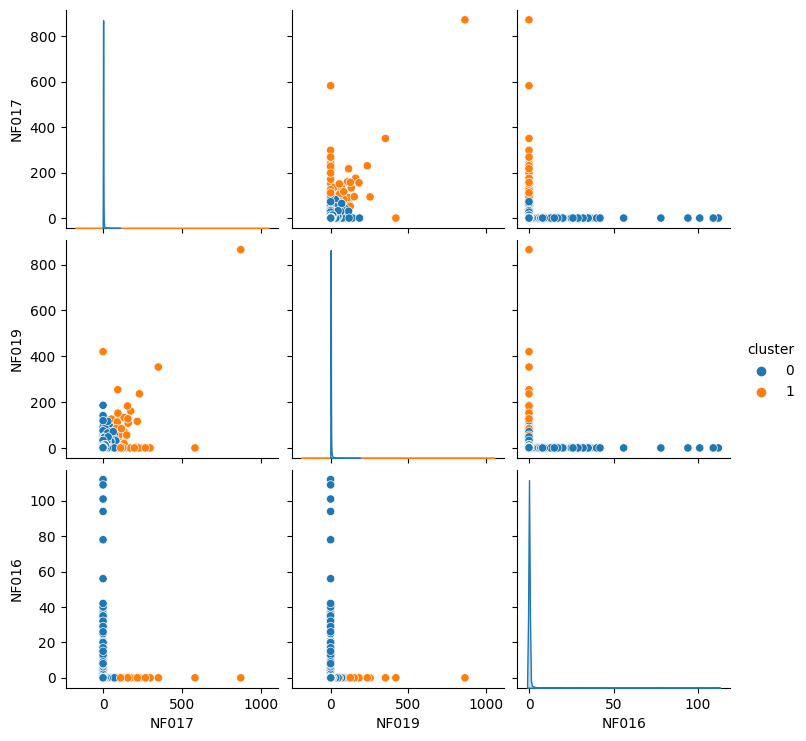

In [146]:
sns.pairplot(data=df_clustering, hue="cluster", palette="tab10")

## aqui podemos observar el comportamiento de los dos grupos cada par de entradass en este caso las redflag, vemos como para la NF016 Nno hay mayor alteracion debido a que como se vio no influye de manera significativa en los grupos, si comparamos la NF016 con la NF017 o la NF019 vemos que no hay una relacion lineal ni de ningun tipo ya que cuando las empresas entran dentro de la NF016 (mayor a cero) la NF017 o NF019 son cero, en cuanto a NF017 y NF019 si que hay mas relacion y vemos como se forman los dos grupos dado la cantidad de incidencias que tenga una empresa en alguna de las dos redflags , entonces dado estos podemos decir que las empresa del grupo 1 son corruptas o fueron participes de un proceso de contratacion corrupto, mientras que las del grupo  no 